Dibujo campaña

In [254]:
# Importamos las librerias a utilizar:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import seaborn as sns


In [255]:
# Disponemos del enlace al fichero csv de agencia tributaria, donde se encuentra la informacion de datos evolución temporal de declaraciones IRPF  :
# https://sede.agenciatributaria.gob.es/static_files/Sede/Tema/Estadisticas/Anuario_estadistico/Exportacion/modelo100.csv

# URL del archivo CSV
url = "https://sede.agenciatributaria.gob.es/static_files/Sede/Tema/Estadisticas/Anuario_estadistico/Exportacion/modelo100.csv"

# Cargar los datos desde la URL
try:
    datos = pd.read_csv(url, encoding='latin1', sep=';', decimal=',')  # Ajustar según el formato del archivo
    print("Datos cargados correctamente")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

# Explorar los datos
print(datos.head())  # Muestra las primeras 5 filas
print(datos.info())  # Información sobre el dataset

Datos cargados correctamente
   EJER  CCAA  PROV  SEXO  NACIONALIDAD  MODELO        M100_1        M100_2  \
0  2022     2    50     2             1     100  2.402242e+08  1.392338e+08   
1  2022     2    50     2             0     100  5.041430e+09  3.986955e+09   
2  2022     2    50     1             0     100  7.687303e+09  6.634276e+09   
3  2022     2    50     1             1     100  5.174031e+08  3.834001e+08   
4  2022     1    41     2             0     100  7.791371e+09  5.851710e+09   

         M100_3      M100_4  ...      M100_26     M100_27      M100_28  \
0  6.885419e+05    47529.92  ...    552332.35     1224.50    138378.34   
1  1.756428e+08  2270116.23  ...  21927123.70   129733.03   9423557.32   
2  2.442796e+08  3771916.95  ...  31785963.14   399237.16  10290143.12   
3  1.508170e+06    37571.37  ...   1019075.76    29092.42    203418.32   
4  1.450536e+08  3161104.33  ...  29582909.85  1549420.53  11478900.10   

      M100_29       M100_30      M100_31      M100_

In [256]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EJER          2632 non-null   int64  
 1   CCAA          2632 non-null   int64  
 2   PROV          2632 non-null   int64  
 3   SEXO          2632 non-null   int64  
 4   NACIONALIDAD  2632 non-null   int64  
 5   MODELO        2632 non-null   int64  
 6   M100_1        2632 non-null   float64
 7   M100_2        2632 non-null   float64
 8   M100_3        2632 non-null   float64
 9   M100_4        2632 non-null   float64
 10  M100_5        2632 non-null   float64
 11  M100_6        2632 non-null   float64
 12  M100_7        2632 non-null   float64
 13  M100_8        2632 non-null   float64
 14  M100_9        2632 non-null   float64
 15  M100_10       2632 non-null   float64
 16  M100_11       2632 non-null   float64
 17  M100_12       2632 non-null   float64
 18  M100_13       2632 non-null 

Analisis previo de las variables:

|Columna/Variable | Descripción |Tipo de Variable|Importancia Inicial|Notas|
| ---------------- | ----------- |-|-|-|
|EJER|Periodo impositivo o año de la declaración |Numerica|0|Realmente deberia ser variable Datatime para facilitar el analisis| 
|CCAA|Comunidad autonoma del declarante|Numerica|1|Necesitamos convertirla a categorica para facilitar la visualizacion de datos, puede ser interesante aunque de momento nos centramos en las prov|
|PROV|Provincia del declarante|Numerica|1|Necesitaremos convertirla en categorica, sera la unidad de analisis de geolocalizacion menor que disponemos, no podemos obtener datos por municipios|
|SEXO|Sexo del declarante principal 1:Hombre, 2:Mujer|Numerica|2|La convertiremos en categorica para facilitar analisis|
|NACIONALIDAD|Nacionalidad del declarante 0: Nacional, 1: Extranjero |Binaria|||
|M100_i| Son la suma de las casillas de la declaracion de renta, solo nos centraremos en la relevantes para nuestro estudio que abajo detallamos:
|M100_14| BASE IMPONIBLE TOTAL: renta generada en el periodo  |Numerica|1||
|M100_28| Deducion por donativos: importe que se ha deducido en la declaracion de la renta por donativos realizados|Numerica|2|variable a analizar|
|M100_34| Numero de declarantes: suma de declarantes incluye declarante principal y su pareja en caso de unidad familiar.|Numerica|2|Nos servira para analizar el %| 

In [257]:
# Realizamos analisis univariante para determinar variables relavantes y acciones a realizar sobre ellas:
# EJER es una variable de tiempo que indica el año de las declaraciones de IRPF, esta como integer, vamos a convertirla en DataTime:
#datos["EJER"] = pd.to_datetime(datos["EJER"], format="%Y")

print(datos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EJER          2632 non-null   int64  
 1   CCAA          2632 non-null   int64  
 2   PROV          2632 non-null   int64  
 3   SEXO          2632 non-null   int64  
 4   NACIONALIDAD  2632 non-null   int64  
 5   MODELO        2632 non-null   int64  
 6   M100_1        2632 non-null   float64
 7   M100_2        2632 non-null   float64
 8   M100_3        2632 non-null   float64
 9   M100_4        2632 non-null   float64
 10  M100_5        2632 non-null   float64
 11  M100_6        2632 non-null   float64
 12  M100_7        2632 non-null   float64
 13  M100_8        2632 non-null   float64
 14  M100_9        2632 non-null   float64
 15  M100_10       2632 non-null   float64
 16  M100_11       2632 non-null   float64
 17  M100_12       2632 non-null   float64
 18  M100_13       2632 non-null 

In [258]:
# La variable CCAA es una variable numerica pero en la pagIna de Agencia Tributaria recoge los nombres 
# Vamos a convertirlo en su nombre en variable categorica:

dicc_ccaa = {1: "Andalucía", 
             2: "Aragón", 
             3: "Asturias, Principado de", 
             4: "Balears, Illes", 
             5: "Canarias", 
             6: "Cantabria", 
             7:"Castilla y León", 
             8: "Castilla - La Mancha", 
             9: "Cataluña", 
             10: "Comunitat Valenciana", 
             11:"Extremadura",  
             12: "Galicia", 
             13:"Madrid, Comunidad de", 
             14: "Murcia, Región de", 
             15: "Rioja, La", 
             77: "Resto" }

datos["CCAA"] = datos["CCAA"].map(dicc_ccaa)
datos.head(5) 

,EJER,CCAA,PROV,SEXO,NACIONALIDAD,MODELO,M100_1,M100_2,M100_3,M100_4,...,M100_26,M100_27,M100_28,M100_29,M100_30,M100_31,M100_32,M100_33,M100_34,M100_35
0,2022,Aragón,50,2,1,100,2.402242e+08,1.392338e+08,6.885419e+05,47529.92,...,552332.35,1224.50,138378.34,32857.80,1.900544e+07,-1205120.38,-3415980.73,3283459.71,19668,18893
1,2022,Aragón,50,2,0,100,5.041430e+09,3.986955e+09,1.756428e+08,2270116.23,...,21927123.70,129733.03,9423557.32,1317522.89,8.754756e+08,57613197.10,37734109.91,30076947.82,239425,234487
2,2022,Aragón,50,1,0,100,7.687303e+09,6.634276e+09,2.442796e+08,3771916.95,...,31785963.14,399237.16,10290143.12,1981441.11,1.599496e+09,84688973.53,69828479.58,19789191.08,317648,271915
3,2022,Aragón,50,1,1,100,5.174031e+08,3.834001e+08,1.508170e+06,37571.37,...,1019075.76,29092.42,203418.32,81158.56,6.654885e+07,5856680.30,4299785.89,3093142.29,33966,28575
4,2022,Andalucía,41,2,0,100,7.791371e+09,5.851710e+09,1.450536e+08,3161104.33,...,29582909.85,1549420.53,11478900.10,6975357.49,1.260028e+09,64049253.39,9039728.83,79652697.35,432838,414157


In [259]:
# La variable PROV es una variable numerica pero en la pagina de Agencia Tributaria recoge los nombres 
# Vamos a convertirlo en su nombre en variable categorica:
# En este caso como son muchos datos lo tenemos en un ficheto de txt y vamos automatizar el proceso de crear el diccionario

# Lista original
texto_prov = """
2 Albacete
3 Alicante/Alacant
4 Almería
5 Ávila
6 Badajoz
7 Balears, Illes
8 Barcelona
9 Burgos
10 Cáceres
11 Cádiz
12 Castellón/Castelló
13 Ciudad Real
14 Córdoba
15 Coruña, A
16 Cuenca
17 Girona
18 Granada
19 Guadalajara
21 Huelva
22 Huesca
23 Jaén
24 León
25 Lleida
26 Rioja, La
27 Lugo
28 Madrid
29 Málaga
30 Murcia
32 Ourense
33 Asturias
34 Palencia
35 Palmas, Las
36 Pontevedra
37 Salamanca
38 Santa Cruz de Tenerife
39 Cantabria
40 Segovia
41 Sevilla
42 Soria
43 Tarragona
44 Teruel
45 Toledo
46 Valencia/València
47 Valladolid
49 Zamora
50 Zaragoza
99 Resto
"""

# Crear el diccionario y en el texto eliminamos espacios en blaco y saltos
dicc_prov = {}
lineas = texto_prov.strip().split("\n")
for linea in lineas:
    clave, valor = linea.split(" ", 1)  # Dividir por el primer espacio
    dicc_prov[int(clave)] = valor  # Convertir clave a entero y agregar al diccionario

# Mostrar el diccionario
print(dicc_prov)


{2: 'Albacete', 3: 'Alicante/Alacant', 4: 'Almería', 5: 'Ávila', 6: 'Badajoz', 7: 'Balears, Illes', 8: 'Barcelona', 9: 'Burgos', 10: 'Cáceres', 11: 'Cádiz', 12: 'Castellón/Castelló', 13: 'Ciudad Real', 14: 'Córdoba', 15: 'Coruña, A', 16: 'Cuenca', 17: 'Girona', 18: 'Granada', 19: 'Guadalajara', 21: 'Huelva', 22: 'Huesca', 23: 'Jaén', 24: 'León', 25: 'Lleida', 26: 'Rioja, La', 27: 'Lugo', 28: 'Madrid', 29: 'Málaga', 30: 'Murcia', 32: 'Ourense', 33: 'Asturias', 34: 'Palencia', 35: 'Palmas, Las', 36: 'Pontevedra', 37: 'Salamanca', 38: 'Santa Cruz de Tenerife', 39: 'Cantabria', 40: 'Segovia', 41: 'Sevilla', 42: 'Soria', 43: 'Tarragona', 44: 'Teruel', 45: 'Toledo', 46: 'Valencia/València', 47: 'Valladolid', 49: 'Zamora', 50: 'Zaragoza', 99: 'Resto'}


In [260]:
datos["PROV"] = datos["PROV"].map(dicc_prov)
datos.head(5) 

,EJER,CCAA,PROV,SEXO,NACIONALIDAD,MODELO,M100_1,M100_2,M100_3,M100_4,...,M100_26,M100_27,M100_28,M100_29,M100_30,M100_31,M100_32,M100_33,M100_34,M100_35
0,2022,Aragón,Zaragoza,2,1,100,2.402242e+08,1.392338e+08,6.885419e+05,47529.92,...,552332.35,1224.50,138378.34,32857.80,1.900544e+07,-1205120.38,-3415980.73,3283459.71,19668,18893
1,2022,Aragón,Zaragoza,2,0,100,5.041430e+09,3.986955e+09,1.756428e+08,2270116.23,...,21927123.70,129733.03,9423557.32,1317522.89,8.754756e+08,57613197.10,37734109.91,30076947.82,239425,234487
2,2022,Aragón,Zaragoza,1,0,100,7.687303e+09,6.634276e+09,2.442796e+08,3771916.95,...,31785963.14,399237.16,10290143.12,1981441.11,1.599496e+09,84688973.53,69828479.58,19789191.08,317648,271915
3,2022,Aragón,Zaragoza,1,1,100,5.174031e+08,3.834001e+08,1.508170e+06,37571.37,...,1019075.76,29092.42,203418.32,81158.56,6.654885e+07,5856680.30,4299785.89,3093142.29,33966,28575
4,2022,Andalucía,Sevilla,2,0,100,7.791371e+09,5.851710e+09,1.450536e+08,3161104.33,...,29582909.85,1549420.53,11478900.10,6975357.49,1.260028e+09,64049253.39,9039728.83,79652697.35,432838,414157


In [261]:
# Convertimos en categorica la variable sexo:
dicc_sexo = {1: "Hombre", 
             2: "Mujer", 
            }

datos["SEXO"] = datos["SEXO"].map(dicc_sexo)
datos.head(5) 

,EJER,CCAA,PROV,SEXO,NACIONALIDAD,MODELO,M100_1,M100_2,M100_3,M100_4,...,M100_26,M100_27,M100_28,M100_29,M100_30,M100_31,M100_32,M100_33,M100_34,M100_35
0,2022,Aragón,Zaragoza,Mujer,1,100,2.402242e+08,1.392338e+08,6.885419e+05,47529.92,...,552332.35,1224.50,138378.34,32857.80,1.900544e+07,-1205120.38,-3415980.73,3283459.71,19668,18893
1,2022,Aragón,Zaragoza,Mujer,0,100,5.041430e+09,3.986955e+09,1.756428e+08,2270116.23,...,21927123.70,129733.03,9423557.32,1317522.89,8.754756e+08,57613197.10,37734109.91,30076947.82,239425,234487
2,2022,Aragón,Zaragoza,Hombre,0,100,7.687303e+09,6.634276e+09,2.442796e+08,3771916.95,...,31785963.14,399237.16,10290143.12,1981441.11,1.599496e+09,84688973.53,69828479.58,19789191.08,317648,271915
3,2022,Aragón,Zaragoza,Hombre,1,100,5.174031e+08,3.834001e+08,1.508170e+06,37571.37,...,1019075.76,29092.42,203418.32,81158.56,6.654885e+07,5856680.30,4299785.89,3093142.29,33966,28575
4,2022,Andalucía,Sevilla,Mujer,0,100,7.791371e+09,5.851710e+09,1.450536e+08,3161104.33,...,29582909.85,1549420.53,11478900.10,6975357.49,1.260028e+09,64049253.39,9039728.83,79652697.35,432838,414157


In [262]:
# Convertimos en categorica la variable nacionalidad:
dicc_nac = {0: "Nacional", 
             1: "Extranjero", 
            }

datos["NACIONALIDAD"] = datos["NACIONALIDAD"].map(dicc_nac)
datos.head(5) 

,EJER,CCAA,PROV,SEXO,NACIONALIDAD,MODELO,M100_1,M100_2,M100_3,M100_4,...,M100_26,M100_27,M100_28,M100_29,M100_30,M100_31,M100_32,M100_33,M100_34,M100_35
0,2022,Aragón,Zaragoza,Mujer,Extranjero,100,2.402242e+08,1.392338e+08,6.885419e+05,47529.92,...,552332.35,1224.50,138378.34,32857.80,1.900544e+07,-1205120.38,-3415980.73,3283459.71,19668,18893
1,2022,Aragón,Zaragoza,Mujer,Nacional,100,5.041430e+09,3.986955e+09,1.756428e+08,2270116.23,...,21927123.70,129733.03,9423557.32,1317522.89,8.754756e+08,57613197.10,37734109.91,30076947.82,239425,234487
2,2022,Aragón,Zaragoza,Hombre,Nacional,100,7.687303e+09,6.634276e+09,2.442796e+08,3771916.95,...,31785963.14,399237.16,10290143.12,1981441.11,1.599496e+09,84688973.53,69828479.58,19789191.08,317648,271915
3,2022,Aragón,Zaragoza,Hombre,Extranjero,100,5.174031e+08,3.834001e+08,1.508170e+06,37571.37,...,1019075.76,29092.42,203418.32,81158.56,6.654885e+07,5856680.30,4299785.89,3093142.29,33966,28575
4,2022,Andalucía,Sevilla,Mujer,Nacional,100,7.791371e+09,5.851710e+09,1.450536e+08,3161104.33,...,29582909.85,1549420.53,11478900.10,6975357.49,1.260028e+09,64049253.39,9039728.83,79652697.35,432838,414157


In [263]:
# Las casillas de la renta relevantes para nuestro estudio vamos a renombrarlas con terminos mas entendibles:
datos = datos.rename(columns={"M100_14": "BIT", "M100_28":"Deduccion_donativos", "M100_34":"num_declarantes"})
datos.head(5)

,EJER,CCAA,PROV,SEXO,NACIONALIDAD,MODELO,M100_1,M100_2,M100_3,M100_4,...,M100_26,M100_27,Deduccion_donativos,M100_29,M100_30,M100_31,M100_32,M100_33,num_declarantes,M100_35
0,2022,Aragón,Zaragoza,Mujer,Extranjero,100,2.402242e+08,1.392338e+08,6.885419e+05,47529.92,...,552332.35,1224.50,138378.34,32857.80,1.900544e+07,-1205120.38,-3415980.73,3283459.71,19668,18893
1,2022,Aragón,Zaragoza,Mujer,Nacional,100,5.041430e+09,3.986955e+09,1.756428e+08,2270116.23,...,21927123.70,129733.03,9423557.32,1317522.89,8.754756e+08,57613197.10,37734109.91,30076947.82,239425,234487
2,2022,Aragón,Zaragoza,Hombre,Nacional,100,7.687303e+09,6.634276e+09,2.442796e+08,3771916.95,...,31785963.14,399237.16,10290143.12,1981441.11,1.599496e+09,84688973.53,69828479.58,19789191.08,317648,271915
3,2022,Aragón,Zaragoza,Hombre,Extranjero,100,5.174031e+08,3.834001e+08,1.508170e+06,37571.37,...,1019075.76,29092.42,203418.32,81158.56,6.654885e+07,5856680.30,4299785.89,3093142.29,33966,28575
4,2022,Andalucía,Sevilla,Mujer,Nacional,100,7.791371e+09,5.851710e+09,1.450536e+08,3161104.33,...,29582909.85,1549420.53,11478900.10,6975357.49,1.260028e+09,64049253.39,9039728.83,79652697.35,432838,414157


In [264]:
# Agrupar por el año (EJER) y calcular la suma de las columnas M100_1 y M100_2
evolucion = datos.groupby('EJER')[["BIT", 'Deduccion_donativos',"num_declarantes"]].sum()/1000000

# Calcular el porcentaje que M100_1 representa sobre M100_2
evolucion['Porcentaje_DD_BIT'] = (evolucion['Deduccion_donativos'] / evolucion['BIT']) * 100



evolucion

,BIT,Deduccion_donativos,num_declarantes,Porcentaje_DD_BIT
EJER,,,,
2009,403015.802482,175.293660,23.210933,0.043495
2010,389941.779983,189.649803,23.018053,0.048635
2011,392430.750058,197.788136,23.160483,0.050401
2012,373494.753439,204.127853,23.025775,0.054653
2013,369950.325494,211.702378,22.802059,0.057225
2014,375044.956322,221.491025,22.907717,0.059057
2015,392219.535852,341.573369,22.942875,0.087087
2016,407197.249338,480.540272,23.006117,0.118012
2017,426519.681265,517.033678,23.155025,0.121222


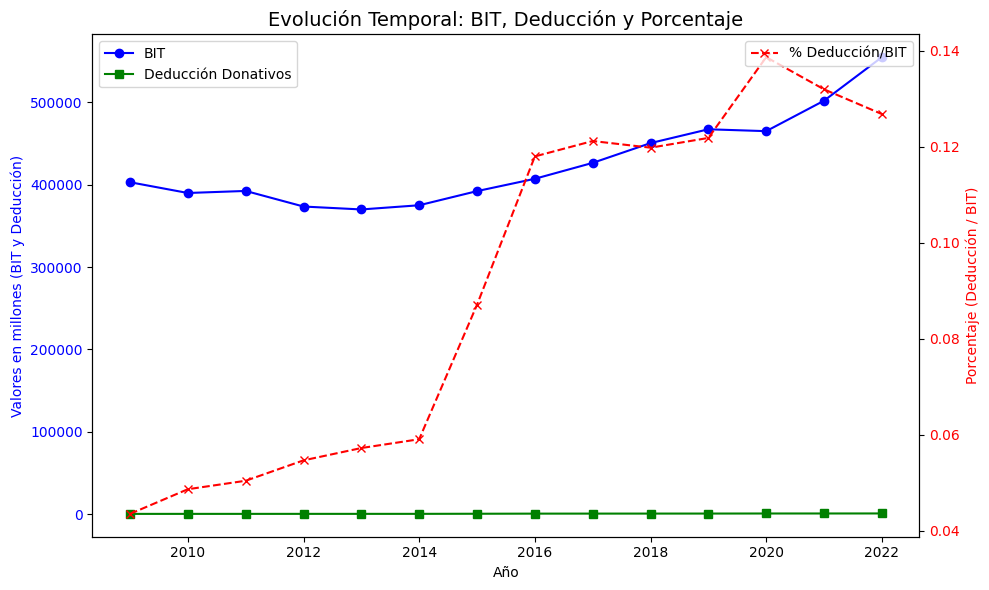

In [265]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje Y izquierdo (valores de las dos primeras variables)
ax1.set_xlabel('Año')
ax1.set_ylabel('Valores en millones (BIT y Deducción)', color='blue')
ax1.plot(evolucion.index, evolucion['BIT'], label='BIT', color='blue', marker='o')
ax1.plot(evolucion.index, evolucion['Deduccion_donativos'], label='Deducción Donativos', color='green', marker='s')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Eje Y derecho (porcentaje)
ax2 = ax1.twinx()
ax2.set_ylabel('Porcentaje (Deducción / BIT)', color='red')
ax2.plot(evolucion.index, evolucion['Porcentaje_DD_BIT'], label='% Deducción/BIT', color='red', linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Configurar título y ajustar el diseño
plt.title('Evolución Temporal: BIT, Deducción y Porcentaje', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Desde 2009, en España ha habido varios cambios regulatorios significativos en las deducciones por donaciones en el IRPF (Impuesto sobre la Renta de las Personas Físicas). Estas modificaciones han tenido un impacto en las deducciones fiscales disponibles para los contribuyentes que realicen donaciones a entidades sin fines de lucro. A continuación, te resumo los cambios más relevantes:

1. Ley 26/2009, de 23 de diciembre, de medidas fiscales para la sostenibilidad energética (2009)
Aumento de las deducciones por donativos: Esta ley introdujo una mejora en las deducciones fiscales para donaciones a entidades sin ánimo de lucro. Las deducciones pasaron a ser más atractivas tanto para los donantes individuales como para las empresas.
Nueva deducción para personas físicas: Se introdujo un incremento en el porcentaje de deducción sobre los primeros 150 euros de donación (del 25% al 30%). Por encima de esta cantidad, el porcentaje de deducción era del 35%.
Deducción para empresas: Las empresas también podían deducir un porcentaje de sus donaciones, con un porcentaje mayor en algunos casos.
2. Ley 27/2014, de 27 de noviembre, del Impuesto sobre Sociedades (2014)
Aumento de deducciones para empresas: Aunque la ley afecta principalmente a las empresas, esta ley también aumentó las deducciones fiscales para las donaciones realizadas a fundaciones y ONGs.
Establecimiento de límites: En este contexto, se establecieron límites para las deducciones de las donaciones realizadas por empresas y se aclararon las condiciones para poder beneficiarse de las mismas.
3. Ley 48/2015, de 29 de octubre, de Presupuestos Generales del Estado para 2016 (2015)
Modificación en los porcentajes de deducción: A partir de esta ley, los porcentajes de deducción por donaciones fueron revisados, destacando que para las donaciones a organizaciones de carácter social, el porcentaje aumentaba hasta el 75% sobre los primeros 150 euros donados, y el 30% para el resto de la donación.
Incremento para donantes recurrentes: Se introdujo un beneficio adicional para los donantes que realizaban donaciones de manera recurrente a la misma organización. Este porcentaje podía llegar al 35% si la donación se mantenía durante tres años consecutivos.
4. Ley 27/2014, de 27 de noviembre, de medidas de prevención y lucha contra el fraude fiscal (2016)
Límites y control de deducciones: Esta ley también estableció ciertas restricciones en cuanto a las deducciones, con el fin de evitar abusos. La ley introdujo medidas para garantizar que las deducciones se aplicaran de manera correcta y dentro de los límites establecidos.
Aumento de los límites para grandes donaciones: En el caso de las grandes donaciones, el porcentaje de deducción podía aumentar dependiendo de las características del donante (personas físicas o jurídicas).
5. Ley 6/2021, de medidas de prevención y lucha contra el fraude fiscal (2021)
Modificación de los límites de deducción para personas físicas: A partir de esta ley, se estableció un límite para las deducciones fiscales por donaciones. Este límite se fijó en un porcentaje sobre la base imponible, con el objetivo de que las deducciones no supusieran un impacto excesivo en las finanzas públicas.
Ampliación de los beneficiarios de las deducciones: Se amplió la posibilidad de beneficiarse de las deducciones por donaciones a una mayor cantidad de organizaciones sin ánimo de lucro.
6. Ley 11/2021, de medidas urgentes de apoyo a la solvencia empresarial (2021)
Cambios en los beneficios fiscales por donaciones: Esta ley introdujo algunas modificaciones adicionales a los beneficios fiscales por donaciones, ampliando el alcance de las deducciones y simplificando algunos de los procedimientos burocráticos.
7. Ley 22/2022, de medidas de sostenibilidad fiscal y apoyo a la economía social (2022)
Ajustes en la deducción por donaciones: La ley ajustó los límites y las condiciones de las deducciones por donaciones, estableciendo un régimen más flexible para las donaciones a entidades de economía social y entidades del tercer sector.
Refuerzo en la transparencia: Además, la ley introdujo medidas para garantizar la transparencia en la aplicación de las deducciones, promoviendo una mejor gestión de las ayudas y fondos.
Resumen de los principales cambios en los porcentajes de deducción:
Hasta 2009: Las deducciones por donaciones estaban limitadas y no eran tan atractivas.
Desde 2009: Los porcentajes de deducción aumentaron, destacando el 25% en los primeros 150 euros donados y el 35% para cantidades superiores.
2014: Se consolidó la deducción del 30% para donaciones mayores, y las empresas pudieron beneficiarse de mayores deducciones.
2016: Introducción de un beneficio adicional para los donantes recurrentes.
2021: Modificación de límites y ampliación de los beneficiarios.
En resumen, a lo largo de los años, se ha incentivado las donaciones a través de una mayor deducción fiscal tanto para personas físicas como jurídicas, con el objetivo de fomentar la solidaridad y el apoyo al tercer sector en España.

In [266]:
year_mas_reciente = datos['EJER'].max()
year_mas_reciente

np.int64(2022)

In [267]:
# Analizamos en el ultimo año de los datos aportados. Ordenacion de provincias con mayores ingresos y con tamaño del punto el porcentaje de deduccion por donaciones que se aplica a cada una de ellas

# Convertir la columna 'EJER' (si no está en formato datetime)
# datos['EJER'] = pd.to_datetime(datos['EJER'])

# Seleccionar el año más reciente
year_mas_reciente = datos['EJER'].max()
datos_recientes = datos[datos['EJER'] == year_mas_reciente]


provincias = datos_recientes.groupby('PROV')[["BIT", 'Deduccion_donativos',"num_declarantes"]].sum()

# Calcular el porcentaje que M100_1 representa sobre M100_2
provincias['Porcentaje_DD_BIT'] = (provincias['Deduccion_donativos'] / provincias['BIT'])*100
provincias["Deduccion_donativos_media"] = (provincias['Deduccion_donativos']/provincias["num_declarantes"]).round(2)
provincias["BI_media"] = (provincias["BIT"]/provincias["num_declarantes"]).round(2)



provincias.sort_values("Porcentaje_DD_BIT", ascending=False )


,BIT,Deduccion_donativos,num_declarantes,Porcentaje_DD_BIT,Deduccion_donativos_media,BI_media
PROV,,,,,,
Madrid,1.234274e+11,1.985318e+08,4055182,0.160849,48.96,30436.95
Zaragoza,1.332292e+10,2.005550e+07,610707,0.150534,32.84,21815.57
Valladolid,7.146841e+09,1.074654e+07,341868,0.150368,31.43,20905.26
Salamanca,3.727053e+09,5.297019e+06,198182,0.142124,26.73,18806.21
Burgos,4.843011e+09,6.650789e+06,227409,0.137328,29.25,21296.48
Sevilla,1.961125e+10,2.636453e+07,1067149,0.134436,24.71,18377.24
"Rioja, La",4.106889e+09,5.498415e+06,197700,0.133883,27.81,20773.34
Soria,1.098197e+09,1.443041e+06,56181,0.131401,25.69,19547.47
Huesca,2.672619e+09,3.464139e+06,133343,0.129616,25.98,20043.19


In [268]:
datos_recientes

,EJER,CCAA,PROV,SEXO,NACIONALIDAD,MODELO,M100_1,M100_2,M100_3,M100_4,...,M100_26,M100_27,Deduccion_donativos,M100_29,M100_30,M100_31,M100_32,M100_33,num_declarantes,M100_35
0,2022,Aragón,Zaragoza,Mujer,Extranjero,100,2.402242e+08,1.392338e+08,6.885419e+05,47529.92,...,552332.35,1224.50,138378.34,32857.80,1.900544e+07,-1205120.38,-3415980.73,3283459.71,19668,18893
1,2022,Aragón,Zaragoza,Mujer,Nacional,100,5.041430e+09,3.986955e+09,1.756428e+08,2270116.23,...,21927123.70,129733.03,9423557.32,1317522.89,8.754756e+08,57613197.10,37734109.91,30076947.82,239425,234487
2,2022,Aragón,Zaragoza,Hombre,Nacional,100,7.687303e+09,6.634276e+09,2.442796e+08,3771916.95,...,31785963.14,399237.16,10290143.12,1981441.11,1.599496e+09,84688973.53,69828479.58,19789191.08,317648,271915
3,2022,Aragón,Zaragoza,Hombre,Extranjero,100,5.174031e+08,3.834001e+08,1.508170e+06,37571.37,...,1019075.76,29092.42,203418.32,81158.56,6.654885e+07,5856680.30,4299785.89,3093142.29,33966,28575
4,2022,Andalucía,Sevilla,Mujer,Nacional,100,7.791371e+09,5.851710e+09,1.450536e+08,3161104.33,...,29582909.85,1549420.53,11478900.10,6975357.49,1.260028e+09,64049253.39,9039728.83,79652697.35,432838,414157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2022,Comunitat Valenciana,Alicante/Alacant,Hombre,Extranjero,100,1.124622e+09,8.218821e+08,4.762705e+07,1112388.13,...,1685434.86,31061.30,372538.37,3508796.53,1.820214e+08,68943758.26,65993230.11,5230584.44,86694,72149
184,2022,Castilla - La Mancha,Albacete,Mujer,Nacional,100,1.572567e+09,1.171323e+09,2.885287e+07,570115.04,...,5571742.93,12887.27,2073693.49,6716678.24,2.347529e+08,6075761.97,-3701519.52,14079205.14,86194,83065
185,2022,Castilla - La Mancha,Albacete,Mujer,Extranjero,100,3.731784e+07,1.848205e+07,6.522385e+04,755.35,...,49683.11,0.00,12320.18,164022.24,2.150498e+06,-469113.89,-1016313.77,773349.41,3479,3315
186,2022,Castilla - La Mancha,Albacete,Hombre,Nacional,100,2.398580e+09,1.941626e+09,5.788857e+07,943631.26,...,8967822.93,86372.31,2179236.84,12460563.24,3.963579e+08,-1372141.23,-11817078.17,13805515.32,132916,107108


In [269]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el mapa base de España
# Cargar el archivo GeoJSON con geopandas

mapa = gpd.read_file('spain-provinces.geojson')  # Archivo GeoJSON con las provincias

In [270]:
# Nombres únicos de provincias en el DataFrame
provincias_df = datos['PROV'].unique()

# Nombres únicos de provincias en el GeoDataFrame
provincias_geojson = mapa['name'].unique()

print("Provincias en el DataFrame:", provincias_df)
print("Provincias en el GeoJSON:", provincias_geojson)

Provincias en el DataFrame: ['Zaragoza' 'Sevilla' 'Segovia' 'Palencia' 'Tarragona' 'Cantabria'
 'Santa Cruz de Tenerife' 'Jaén' 'Palmas, Las' 'Madrid' 'Pontevedra'
 'Murcia' 'León' 'Huesca' 'Resto' 'Toledo' 'Zamora' 'Asturias' 'Rioja, La'
 'Lugo' 'Valladolid' 'Ourense' 'Teruel' 'Soria' 'Salamanca' 'Lleida'
 'Málaga' 'Valencia/València' 'Huelva' 'Guadalajara' 'Granada' 'Girona'
 'Cuenca' 'Coruña, A' 'Córdoba' 'Ciudad Real' 'Castellón/Castelló' 'Cádiz'
 'Cáceres' 'Burgos' 'Barcelona' 'Balears, Illes' 'Badajoz' 'Ávila'
 'Almería' 'Alicante/Alacant' 'Albacete']
Provincias en el GeoJSON: ['Illes Balears' 'Asturias' 'A Coruña' 'Girona' 'Las Palmas' 'Pontevedra'
 'Santa Cruz De Tenerife' 'Cantabria' 'Málaga' 'Almería' 'Murcia'
 'Albacete' 'Ávila' 'Araba/Álava' 'Badajoz' 'Alacant/Alicante' 'Ourense'
 'Barcelona' 'Burgos' 'Cáceres' 'Cádiz' 'Castelló/Castellón' 'Ciudad Real'
 'Jaén' 'Córdoba' 'Cuenca' 'Granada' 'Guadalajara' 'Gipuzkoa/Guipúzcoa'
 'Huelva' 'Huesca' 'León' 'Lleida' 'La Rioja' 'Sor

In [271]:
# Provincias en el DataFrame que no están en el GeoJSON
provincias_no_en_geojson = set(provincias_df) - set(provincias_geojson)

# Provincias en el GeoJSON que no están en el DataFrame
provincias_no_en_df = set(provincias_geojson) - set(provincias_df)

print("Provincias en el DataFrame pero no en el GeoJSON:", provincias_no_en_geojson)
print("Provincias en el GeoJSON pero no en el DataFrame:", provincias_no_en_df)

Provincias en el DataFrame pero no en el GeoJSON: {'Balears, Illes', 'Valencia/València', 'Rioja, La', 'Alicante/Alacant', 'Palmas, Las', 'Resto', 'Coruña, A', 'Santa Cruz de Tenerife', 'Castellón/Castelló'}
Provincias en el GeoJSON pero no en el DataFrame: {'Gipuzkoa/Guipúzcoa', 'Araba/Álava', 'La Rioja', 'Bizkaia/Vizcaya', 'Melilla', 'Santa Cruz De Tenerife', 'Navarra', 'Castelló/Castellón', 'Alacant/Alicante', 'A Coruña', 'Las Palmas', 'València/Valencia', 'Illes Balears', 'Ceuta'}


In [272]:
# Diccionario de correspondencia para ajustar nombres
correcciones = {'Castelló/Castellón':'Castellón/Castelló',
                 'A Coruña':'Coruña, A' ,
                 'Santa Cruz De Tenerife': 'Santa Cruz de Tenerife',
                 'Illes Balears':'Balears, Illes',
                 'Las Palmas': 'Palmas, Las',
                 'La Rioja':'Rioja, La' ,
                 'Alacant/Alicante':'Alicante/Alacant',
                 'València/Valencia':'Valencia/València'
                 }

# Aplicar correcciones al DataFrame
mapa['name'] = mapa['name'].replace(correcciones)

In [273]:
# Nombres únicos de provincias en el DataFrame
provincias_df = datos['PROV'].unique()

# Nombres únicos de provincias en el GeoDataFrame
provincias_geojson = mapa['name'].unique()

print("Provincias en el DataFrame:", provincias_df)
print("Provincias en el GeoJSON:", provincias_geojson)
# Provincias en el DataFrame que no están en el GeoJSON
provincias_no_en_geojson = set(provincias_df) - set(provincias_geojson)

# Provincias en el GeoJSON que no están en el DataFrame
provincias_no_en_df = set(provincias_geojson) - set(provincias_df)

print("Provincias en el DataFrame pero no en el GeoJSON:", provincias_no_en_geojson)
print("Provincias en el GeoJSON pero no en el DataFrame:", provincias_no_en_df)

Provincias en el DataFrame: ['Zaragoza' 'Sevilla' 'Segovia' 'Palencia' 'Tarragona' 'Cantabria'
 'Santa Cruz de Tenerife' 'Jaén' 'Palmas, Las' 'Madrid' 'Pontevedra'
 'Murcia' 'León' 'Huesca' 'Resto' 'Toledo' 'Zamora' 'Asturias' 'Rioja, La'
 'Lugo' 'Valladolid' 'Ourense' 'Teruel' 'Soria' 'Salamanca' 'Lleida'
 'Málaga' 'Valencia/València' 'Huelva' 'Guadalajara' 'Granada' 'Girona'
 'Cuenca' 'Coruña, A' 'Córdoba' 'Ciudad Real' 'Castellón/Castelló' 'Cádiz'
 'Cáceres' 'Burgos' 'Barcelona' 'Balears, Illes' 'Badajoz' 'Ávila'
 'Almería' 'Alicante/Alacant' 'Albacete']
Provincias en el GeoJSON: ['Balears, Illes' 'Asturias' 'Coruña, A' 'Girona' 'Palmas, Las'
 'Pontevedra' 'Santa Cruz de Tenerife' 'Cantabria' 'Málaga' 'Almería'
 'Murcia' 'Albacete' 'Ávila' 'Araba/Álava' 'Badajoz' 'Alicante/Alacant'
 'Ourense' 'Barcelona' 'Burgos' 'Cáceres' 'Cádiz' 'Castellón/Castelló'
 'Ciudad Real' 'Jaén' 'Córdoba' 'Cuenca' 'Granada' 'Guadalajara'
 'Gipuzkoa/Guipúzcoa' 'Huelva' 'Huesca' 'León' 'Lleida' 'Rioja, La'


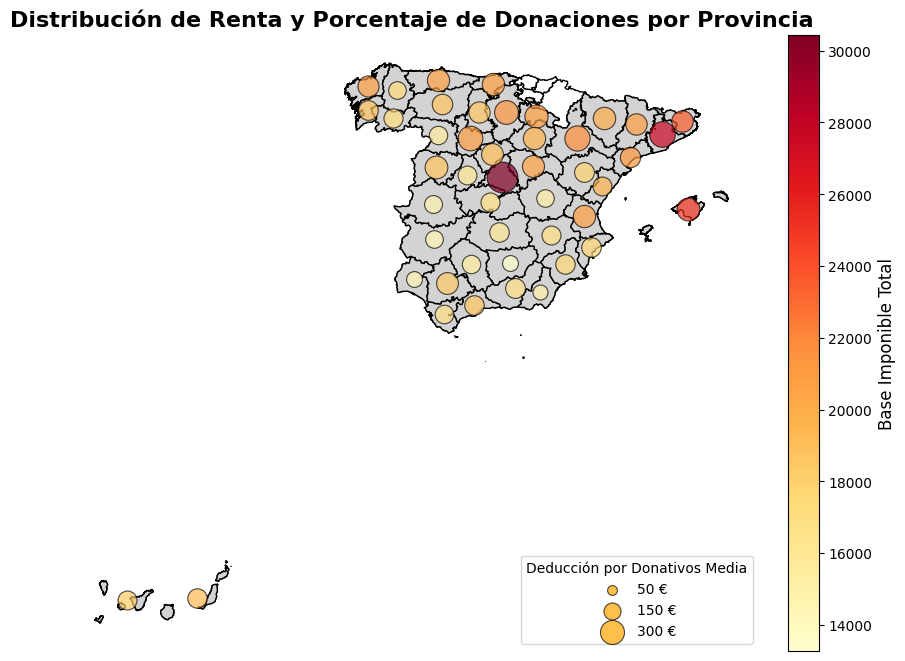

In [281]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import geopandas as gpd

# 4. Combinar el mapa con los datos
mapa_datos = mapa.merge(provincias, left_on='name', right_on="PROV", how="left")

# Eliminar filas con valores nulos
mapa_datos = mapa_datos.dropna()

# 5. Crear un gráfico donde el tamaño y color se ajusten a las variables
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Dibujar el mapa base (provincias sin datos en gris claro)
mapa.plot(ax=ax, color='white', edgecolor='black')

# Dibujar las provincias con datos en gris más oscuro para destacar
mapa_datos.plot(ax=ax, 
                color='lightgrey',  # Base gris para las provincias con datos
                edgecolor='black')

# Normalizar la columna 'BI_media' para asegurar una escala de colores adecuada
norm = plt.Normalize(vmin=mapa_datos['BI_media'].min(), vmax=mapa_datos['BI_media'].max())

# Crear los círculos en el mapa
scatter = []
for idx, row in mapa_datos.iterrows():
    if pd.notnull(row['Deduccion_donativos_media']):  # Solo si hay datos
        circle = ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, 
                            s=row['Deduccion_donativos_media']*10,  # Ajustar tamaño del círculo
                            c=row['BI_media'],  # Color basado en la Base Imponible Total
                            cmap='YlOrRd',  # Escala de colores vibrante
                            norm=norm,  # Asegurarse de que la normalización se aplique
                            alpha=0.7,  # Transparencia moderada
                            edgecolor='black',  # Bordes negros para resaltar los círculos
                            linewidth=0.8)
        scatter.append(circle)

# Añadir barra de color para el BIT (Base Imponible Total)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.03)
cbar.set_label('Base Imponible Total', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Añadir leyenda para el tamaño de los círculos (Deducción por Donativos Media)
# Crear objetos de leyenda con tamaños de puntos representativos
legend_sizes = [50, 150, 300]  # Tamaños de ejemplo para los círculos en la leyenda
legend_labels = ['50', '150', '300']  # Etiquetas para la leyenda

# Crear una leyenda personalizada con puntos de ejemplo
for size, label in zip(legend_sizes, legend_labels):
    ax.scatter([], [], s=size, label=f'{label} €', alpha=0.7, edgecolor='black', linewidth=0.8, color='orange')

# Añadir título y ocultar ejes
plt.title('Distribución de Renta y Porcentaje de Donaciones por Provincia', fontsize=16, fontweight='bold')
plt.axis('off')

# Añadir la leyenda
plt.legend(title="Deducción por Donativos Media", fontsize=10, loc='lower right')

# Mostrar el gráfico
plt.show()



In [ ]:
mapa_datos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 46 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   cod_prov                   46 non-null     object             
 1   name                       46 non-null     object             
 2   cod_ccaa                   46 non-null     object             
 3   cartodb_id                 46 non-null     int32              
 4   created_at                 46 non-null     datetime64[ms, UTC]
 5   updated_at                 46 non-null     datetime64[ms, UTC]
 6   geometry                   46 non-null     geometry           
 7   BIT                        46 non-null     float64            
 8   Deduccion_donativos        46 non-null     float64            
 9   num_declarantes            46 non-null     float64            
 10  Porcentaje_DD_BIT          46 non-null     float64            
 11  Deduc

In [ ]:
mapa_datos.head(2)

,cod_prov,name,cod_ccaa,cartodb_id,created_at,updated_at,geometry,BIT,Deduccion_donativos,num_declarantes,Porcentaje_DD_BIT,Deduccion_donativos_media,BI_media
0,07,"Balears, Illes",03,7,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((3.21364 39.95751, 3.1544 39.92...",1.596287e+10,17278999.20,637758.0,0.108245,27.09,25029.66
1,33,Asturias,18,33,2014-09-30 00:00:00+00:00,2014-12-25 01:56:10+00:00,"MULTIPOLYGON (((-5.84083 43.66062, -5.83002 43...",1.283619e+10,15896500.74,622911.0,0.123841,25.52,20606.78


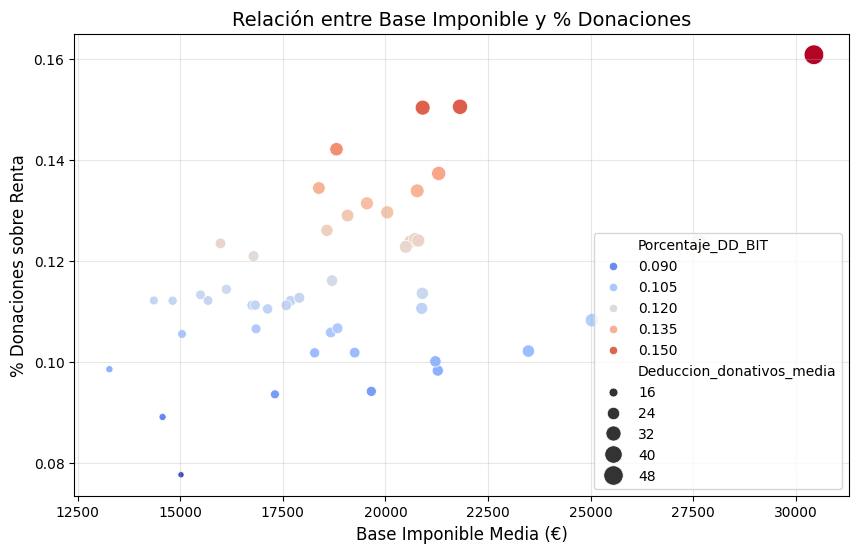

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(provincias, 
                x='BI_media', 
                y='Porcentaje_DD_BIT', 
                hue='Porcentaje_DD_BIT', 
                palette='coolwarm', 
                size='Deduccion_donativos_media', 
                sizes=(20, 200))

# Añadir título y etiquetas
plt.title('Relación entre Base Imponible y % Donaciones', fontsize=14)
plt.xlabel('Base Imponible Media (€)', fontsize=12)
plt.ylabel('% Donaciones sobre Renta', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Calcular la correlación de Pearson
correlacion = provincias['BI_media'].corr(provincias['Porcentaje_DD_BIT'], method='pearson')
print(f'Correlación de Pearson: {correlacion:.2f}')

Correlación de Pearson: 0.48


Si la correlación es significativa (por ejemplo, mayor a 0.5 o menor a -0.5), indica una relación importante entre ambas variables.

en este caso 0.88 hay correlacion significtivda

In [ ]:
provincias

,BIT,Deduccion_donativos,num_declarantes,Porcentaje_DD_BIT,Deduccion_donativos_media,BI_media
PROV,,,,,,
Albacete,3.854278e+09,4.285753e+06,230124,0.111195,18.62,16748.70
Alicante/Alacant,1.747241e+10,1.958341e+07,987845,0.112082,19.82,17687.40
Almería,6.148794e+09,4.773342e+06,409403,0.077631,11.66,15018.93
Asturias,1.283619e+10,1.589650e+07,622911,0.123841,25.52,20606.78
Badajoz,5.336397e+09,5.985025e+06,371702,0.112155,16.10,14356.66
"Balears, Illes",1.596287e+10,1.727900e+07,637758,0.108245,27.09,25029.66
Barcelona,8.926243e+10,1.104350e+08,3230670,0.123719,34.18,27629.70
Burgos,4.843011e+09,6.650789e+06,227409,0.137328,29.25,21296.48
Cantabria,7.300529e+09,9.075600e+06,352315,0.124314,25.76,20721.60


C:\Users\josel\AppData\Local\Temp\ipykernel_15748\2807211987.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd", len(provincias_top))  # Paleta de colores 'YlOrRd' (amarillo a rojo)


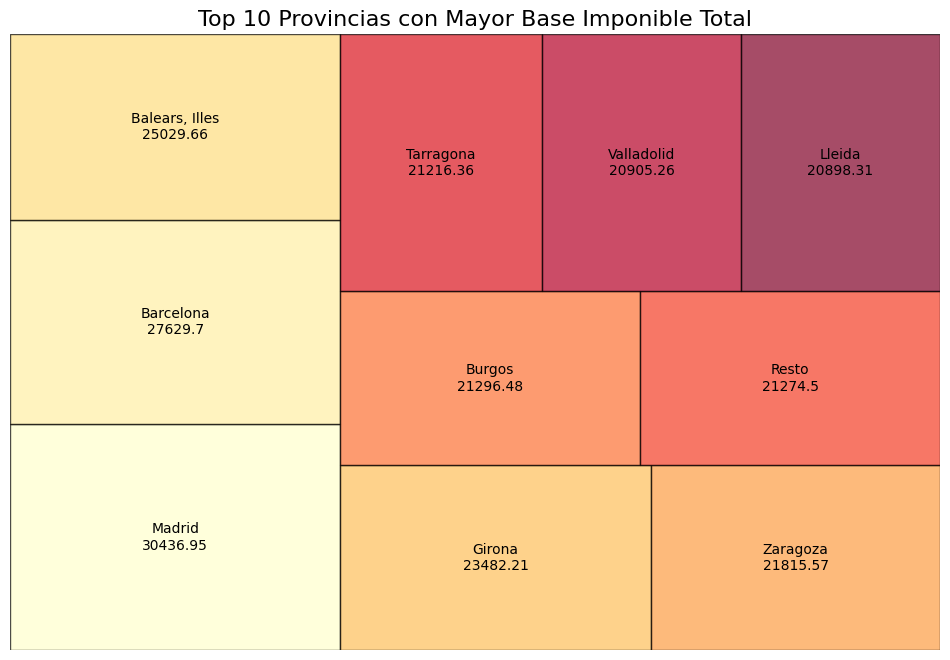

In [ ]:
# Ordenar las provincias por la base imponible media y seleccionar las 10 más altas
provincias_top = provincias.sort_values("BI_media", ascending=False).head(10)

import squarify

# Crear el gráfico de treemap
plt.figure(figsize=(12,8))

# Generar una lista de colores usando una paleta de colores de matplotlib
cmap = plt.cm.get_cmap("YlOrRd", len(provincias_top))  # Paleta de colores 'YlOrRd' (amarillo a rojo)
colors = [cmap(i) for i in range(len(provincias_top))]  # Obtener los colores correspondientes


# Crear el treemap, ajustando el tamaño de los bloques a la renta total (Base Imponible Total)
squarify.plot(sizes=provincias_top["BI_media"], 
              label=provincias_top.index + "\n" + provincias_top["BI_media"].round(2).astype(str),  # Nombre + valor de renta total
              alpha=0.7, 
              color=colors,  # Colores generados
              linewidth=1, 
              edgecolor='black')

# Añadir título
plt.title("Top 10 Provincias con Mayor Base Imponible Total", fontsize=16)

# Mostrar el gráfico sin ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

C:\Users\josel\AppData\Local\Temp\ipykernel_15748\3354373659.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd", len(provincias_top2))  # Paleta de colores 'YlOrRd' (amarillo a rojo)


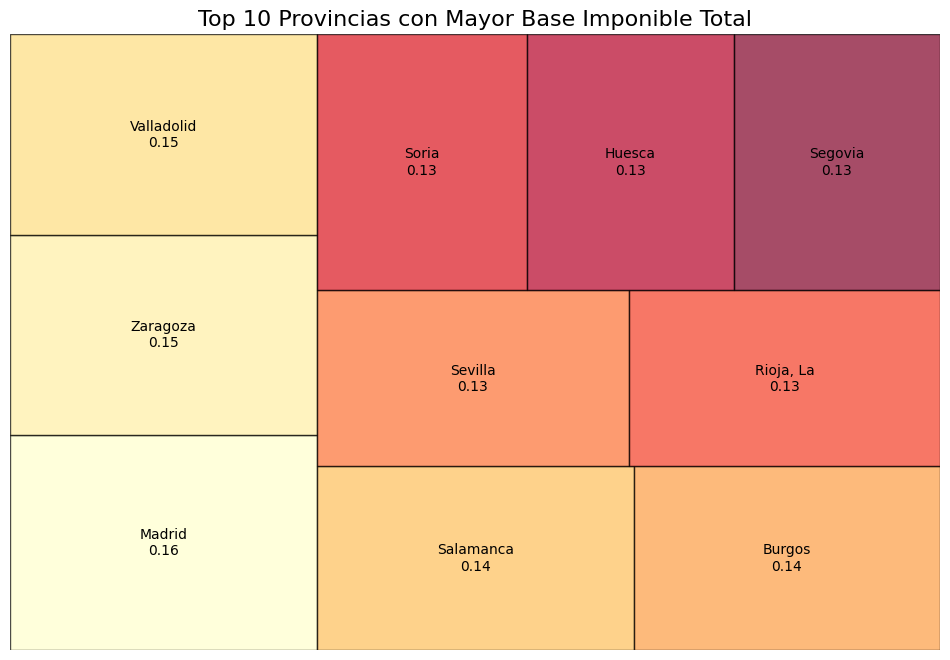

In [ ]:
# Ordenar las provincias por la base imponible media y seleccionar las 10 más altas
provincias_top2 = provincias.sort_values("Porcentaje_DD_BIT", ascending=False).head(10)

import squarify

# Crear el gráfico de treemap
plt.figure(figsize=(12,8))

# Generar una lista de colores usando una paleta de colores de matplotlib
cmap = plt.cm.get_cmap("YlOrRd", len(provincias_top2))  # Paleta de colores 'YlOrRd' (amarillo a rojo)
colors = [cmap(i) for i in range(len(provincias_top2))]  # Obtener los colores correspondientes


# Crear el treemap, ajustando el tamaño de los bloques a la renta total (Base Imponible Total)
squarify.plot(sizes=provincias_top2["Porcentaje_DD_BIT"], 
              label=provincias_top2.index + "\n" + provincias_top2["Porcentaje_DD_BIT"].round(2).astype(str),  # Nombre + valor de renta total
              alpha=0.7, 
              color=colors,  # Colores generados
              linewidth=1, 
              edgecolor='black')

# Añadir título
plt.title("Top 10 Provincias con Mayor Base Imponible Total", fontsize=16)

# Mostrar el gráfico sin ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

In [ ]:
genero = datos_recientes.groupby('SEXO')[["BIT", 'Deduccion_donativos',"num_declarantes"]].sum()

# Calcular el porcentaje que M100_1 representa sobre M100_2
genero['Porcentaje_DD_BIT'] = (genero['Deduccion_donativos'] / genero['BIT'])*100
genero["Deduccion_donativos_media"] = (genero['Deduccion_donativos']/genero["num_declarantes"]).round(2)
genero["BI_media"] = (genero["BIT"]/genero["num_declarantes"]).round(2)



genero.sort_values("Porcentaje_DD_BIT", ascending=False )

,BIT,Deduccion_donativos,num_declarantes,Porcentaje_DD_BIT,Deduccion_donativos_media,BI_media
SEXO,,,,,,
Mujer,2.152413e+11,3.393474e+08,10924460,0.157659,31.06,19702.70
Hombre,3.396729e+11,3.645287e+08,14530689,0.107318,25.09,23376.24


In [ ]:
nacionalidad = datos_recientes.groupby('NACIONALIDAD')[["BIT", 'Deduccion_donativos',"num_declarantes"]].sum()

# Calcular el porcentaje que M100_1 representa sobre M100_2
nacionalidad['Porcentaje_DD_BIT'] = (nacionalidad['Deduccion_donativos'] / nacionalidad['BIT'])*100
nacionalidad["Deduccion_donativos_media"] = (nacionalidad['Deduccion_donativos']/nacionalidad["num_declarantes"]).round(2)
nacionalidad["BI_media"] = (nacionalidad["BIT"]/nacionalidad["num_declarantes"]).round(2)



nacionalidad.sort_values("Porcentaje_DD_BIT", ascending=False )

,BIT,Deduccion_donativos,num_declarantes,Porcentaje_DD_BIT,Deduccion_donativos_media,BI_media
NACIONALIDAD,,,,,,
Nacional,5.242552e+11,6.856005e+08,23371358,0.130776,29.34,22431.53
Extranjero,3.065900e+10,1.827562e+07,2083791,0.059609,8.77,14713.09


In [ ]:
matriz_correlacion = datos_recientes

C:\Users\josel\AppData\Local\Temp\ipykernel_15748\3052790539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_recientes['relacion_deduccion_bit'] = datos_recientes['Deduccion_donativos'] / datos_recientes['BIT']*100


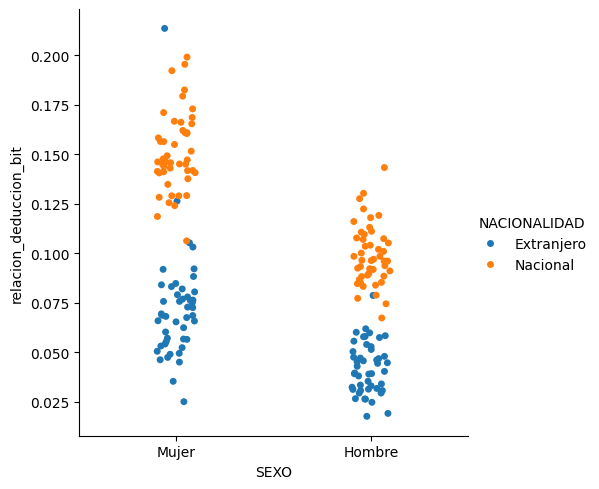

In [ ]:

# Crear una nueva columna con la relación
datos_recientes['relacion_deduccion_bit'] = datos_recientes['Deduccion_donativos'] / datos_recientes['BIT']*100

sns.catplot(x="SEXO", y="relacion_deduccion_bit", hue="NACIONALIDAD", data=datos_recientes, kind="strip")